In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import os
import seaborn as sns


In [19]:
df = pd.read_csv(R'D:\code\data_science\World_Governments_Expenditure_Dataset\data\WorldExpenditures.csv')
df = df[df['Sector'] != 'Total function']

In [20]:
df.head()

,Unnamed: 0,Year,Country,Sector,Expenditure(million USD),GDP(%)
1,1,2000,Australia,"Agriculture, forestry, fishing and hunting",2195.583,0.53572
2,2,2000,Australia,"Mining, manufacturing and construction",905.018,0.22082
3,3,2000,Australia,Transport,11417.379,2.78584
4,4,2000,Australia,Fuel and energy,2251.241,0.54930
5,5,2000,Australia,Environment protection,2051.800,0.50064


In [21]:
def check_df(df):
    print("=================== Shape =========================================")
    print(df.shape)
    print("================= Data types ======================================")
    print(df.dtypes)
    print("=================== Tail ==========================================")
    print(df.tail())
    print("================== Is null ========================================")
    print(df.isnull().sum())
    print("===================================================================")

check_df(df)

=================== Shape =========================================
(24095, 6)
================= Data types ======================================
Unnamed: 0                    int64
Year                          int64
Country                      object
Sector                       object
Expenditure(million USD)    float64
GDP(%)                      float64
dtype: object
=================== Tail ==========================================
       Unnamed: 0  Year                   Country  \
25728       25728  2021  United States of America   
25729       25729  2021  United States of America   
25730       25730  2021  United States of America   
25731       25731  2021  United States of America   
25732       25732  2021  United States of America   

                                 Sector  Expenditure(million USD)    GDP(%)  
25728                 Social protection                2827585.06  12.07255  
25729           General public services                1291640.23   5.51474  
25

In [22]:
print("================= Calculo das despesas gerais ========================")
df['Expenditure(million USD)'].describe().round(2)

================= Calculo das despesas gerais ========================


count      23563.00
mean       19045.59
std        94025.70
min            0.00
25%          113.01
50%          938.17
75%         6437.38
max      2827585.06
Name: Expenditure(million USD), dtype: float64

In [23]:
sector = df['Sector']
sector_list = sector.unique()

print("================== Todos os setores ==================================")
for setores in sector_list:
    print(setores)
print("======================================================================")

================== Todos os setores ==================================
Agriculture, forestry, fishing and hunting
Mining, manufacturing and construction
Transport
Fuel and energy
Environment protection
Housing and community amenities
Health
Education
Social protection
General public services
Defence
Public order and safety
Recreation, culture and religion
General economic, commercial and labour affairs
Other industries
RandD Economic affairs
Economic affairs n.e.c.
Communication
Social p rotection
Others


In [24]:
df_total_function = df[df['Sector'] == 'Total function']
df_total_function.head()

,Unnamed: 0,Year,Country,Sector,Expenditure(million USD),GDP(%)


In [25]:
print("================= Comparaçao entre países ========================")

summary_by_country = df.groupby('Country').agg({'Expenditure(million USD)': 'mean', 'GDP(%)': 'mean'})
summary_by_country = summary_by_country.sort_values(by='Expenditure(million USD)', ascending=False)
print(summary_by_country.head(10))

================= Comparaçao entre países ========================
                          Expenditure(million USD)    GDP(%)
Country                                                     
United States of America             629038.809949  3.890277
China                                155729.299504  1.662163
Japan                                112168.807814  2.179289
Germany                               84524.513174  2.571905
France                                75246.645222  3.072245
United Kingdom                        61892.490647  2.372730
Italy                                 53816.989235  2.794884
India                                 43559.808489  1.878678
Canada                                42884.102476  2.538418
Brazil                                42487.297443  2.710237


In [26]:
df_brasil = df[df['Country'] == 'Brazil'] 
df_brasil = df_brasil[df_brasil['Sector'] != 'Total function']
df_brasil.head()

,Unnamed: 0,Year,Country,Sector,Expenditure(million USD),GDP(%)
49,49,2000,Brazil,"Agriculture, forestry, fishing and hunting",4777.386,0.72887
50,50,2000,Brazil,Transport,7568.216,1.15466
51,51,2000,Brazil,Communication,319.215,0.04870
52,52,2000,Brazil,Fuel and energy,396.633,0.06051
53,53,2000,Brazil,Environment protection,710.650,0.10842


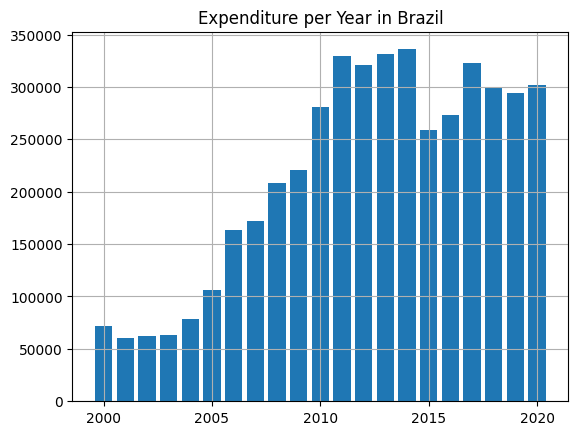

In [27]:
fig, ax = plt.subplots()

ax.bar(df_brasil['Year'], df_brasil['Expenditure(million USD)'])
plt.title('Expenditure per Year in Brazil')
plt.grid(True)

plt.show()